In [19]:
import pandas as pd

In [21]:
df = pd.read_csv('salaries.csv')
df.tail()

,company,job,degree,salary_more_then_100k
11,facebook,sales executive,masters,1
12,facebook,business manager,bachelors,1
13,facebook,business manager,masters,1
14,facebook,computer programmer,bachelors,1
15,facebook,computer programmer,masters,1


In [22]:
inputs = df.drop('salary_more_then_100k', axis='columns')
target = df['salary_more_then_100k']

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [25]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_company.fit_transform(inputs['job'])
inputs['degree_n'] = le_company.fit_transform(inputs['degree'])

In [26]:
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [27]:
input_n = inputs.drop(['company','job','degree'], axis='columns')

In [28]:
input_n.head()

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [29]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(input_n,target, test_size=0.3)

In [42]:
len(X_train)

11

In [43]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0,max_depth=2)

In [44]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [45]:
model.score(X_test, y_test)

0.6

[Text(167.4, 181.2, 'X[0] <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(83.7, 108.72, 'X[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(41.85, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 1.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(209.25, 36.23999999999998, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(292.95, 36.23999999999998, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]')]

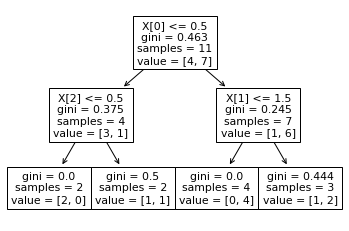

In [46]:
from sklearn import tree
tree.plot_tree(model.fit(X_train, y_train))

### HyperParameter tunning

In [51]:
clf = DecisionTreeClassifier(min_samples_split=2,criterion='entropy')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8